In [7]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from sklearn.metrics import mean_squared_error
import os

In [3]:

# Load the dataset
mat = sio.loadmat('/home/utkarsh/Documents/iitb/gnr602/project/dataset/Indian Pines/Indian_pines.mat')
mat_gt = sio.loadmat('/home/utkarsh/Documents/iitb/gnr602/project/dataset/Indian Pines/Indian_pines_gt.mat')

data = mat['indian_pines']
labels = mat_gt['indian_pines_gt']

# Reshape the data to (num_samples, num_features)
n, m, num_samples = data.shape
data_reshaped = np.reshape(data, (n*m, num_samples))

In [4]:
def save_fig(img, name, dir = '../output/pca', keep_axis = True):
    _ , ax = plt.subplots(figsize=(4,4), dpi=100)
    ax.imshow(img, interpolation='nearest')
    if not keep_axis:
        ax.set_axis_off()
    # ax.xaxis.set_major_locator(plt.NullLocator())
    # ax.yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(os.path.join(dir,name), bbox_inches='tight', pad_inches=0, transparent=True, edgecolor='none', facecolor='none')

In [5]:
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.scale_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [6]:
def pca(X, num_components):
    # Center the data
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean
    
    # Calculate the covariance matrix
    cov_matrix = np.cov(X_centered.T)
    
    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Sort the eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:,sorted_indices]
    
    # Select the top k eigenvectors
    principal_components = sorted_eigenvectors[:,:num_components]
    
    # Project the data onto the new subspace
    data_pca = np.dot(X_centered, principal_components)
    
    return data_pca


/home/utkarsh/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MSE: 68.58116527942926


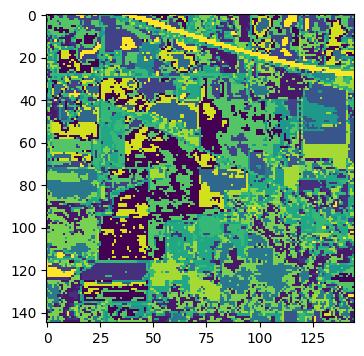

In [8]:

# Perform PCA to reduce the dimensionality of the data
num_components = 16
data_scaled = StandardScaler().fit_transform(data_reshaped)
data_pca = pca(data_scaled, num_components)

# Perform clustering using KMeans
num_clusters = 16
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data_pca)

# Reshape the labels to (num_samples,)
labels_reshaped = np.reshape(labels, (n*m,))

# Assign each pixel to a cluster
cluster_labels = kmeans.predict(data_pca)

# Reshape the cluster labels and display the segmented image
cluster_labels_reshaped = np.reshape(cluster_labels, (n, m))

cluster_labels_flat = np.reshape(cluster_labels, (n*m,))
mse = mean_squared_error(labels_reshaped, cluster_labels_flat)
print("MSE:", mse)
save_fig(cluster_labels_reshaped, 'pca_kmeans.png')